In [1]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Load the data : 

In [2]:
# Load csv data
df = pd.read_csv("housing.csv")

In [3]:
# Print first few rows of data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
# df type
type(df)

pandas.core.frame.DataFrame

In [5]:
#data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
#descript data frames
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
#print the number of columns
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

# 2. handle missing values 

In [8]:
#check for missing values in dataset.
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

### Remarks:

We see 207 null values in column total_bedrooms, replace it with mean value and check the missing value again. 

In [9]:
#mean value
df['total_bedrooms'].mean()

537.8705525375618

In [10]:
# replace missing values in column total_bedrooms with mean value and check for missing values again.
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

# 3. Encode categorical data :

In [11]:
# Convert categorical column ocean_proximity to numerical data.
# using get_dummies for data manipulation for the categorical column ocean_proximity
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [12]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


In [13]:
# Drop 'ocean_proximity_<1H OCEAN' column.
df = df.drop(['ocean_proximity_<1H OCEAN'], axis = 1)

In [14]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1,0,0,0


# 4. Standardize data :

In [15]:
# Standardize training and test datasets.
#import scalar 
from sklearn.preprocessing import StandardScaler
# column names
names = df.columns

# Create the Scaler object
scaler = StandardScaler()

# Fit your data to scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,-0.681889,-0.015566,2.830742,-0.384466


## 5. Visualize relationship between features/independent variables and target :

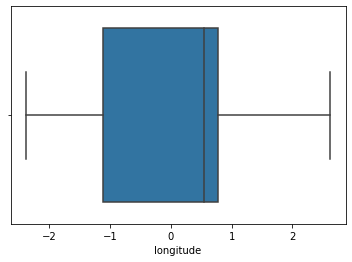

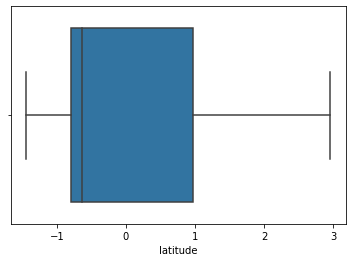

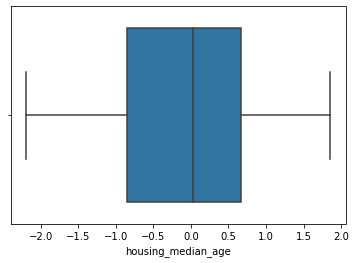

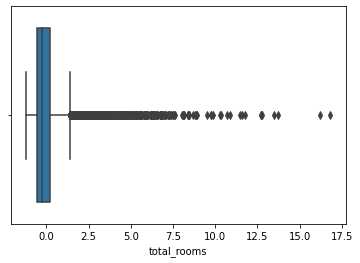

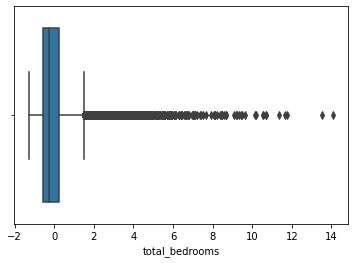

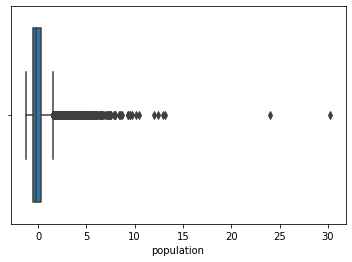

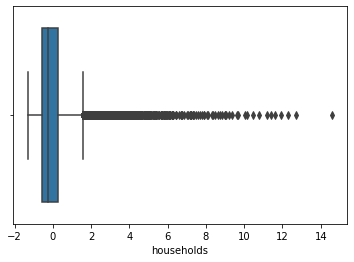

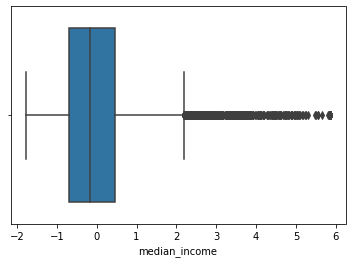

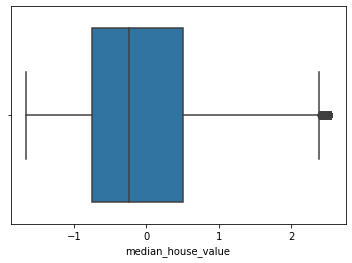

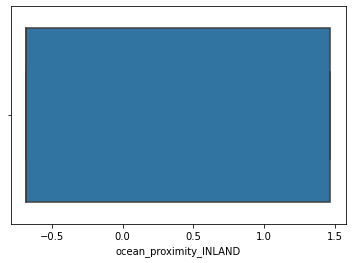

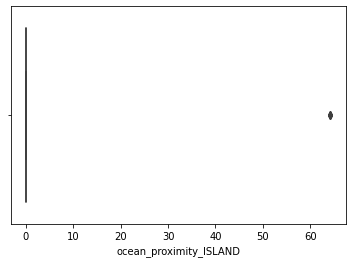

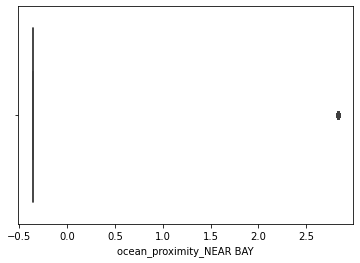

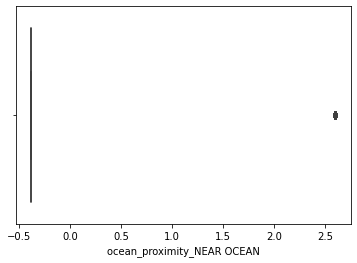

In [16]:
# Create boxplot and check outliers
for column in scaled_df:
    plt.figure()
    sns.boxplot(x=scaled_df[column])

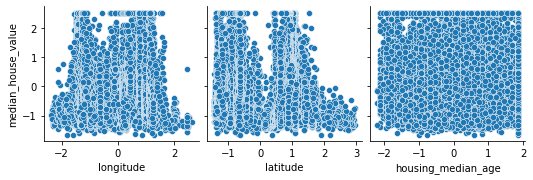

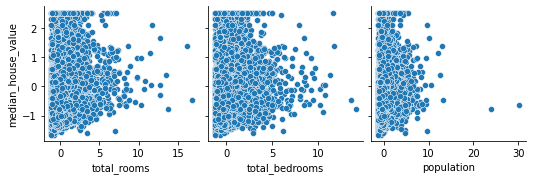

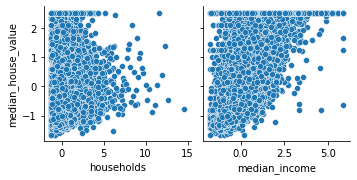

In [17]:
# Visualize relationship between features and target
# lets create a graphs to visulize the relationship between indenpedent variables and target.
sns.pairplot(scaled_df , x_vars=['longitude','latitude', 'housing_median_age'], y_vars= 'median_house_value')
plt.show()
sns.pairplot(scaled_df , x_vars=['total_rooms','total_bedrooms', 'population'], y_vars= 'median_house_value')
plt.show()
sns.pairplot(scaled_df , x_vars=['households','median_income'], y_vars= 'median_house_value')
plt.show()

#### Remarks:

In [18]:
# compute correlations dataframe in order to visualize the correlations amoung variabels through heatmap.
corr_df = df.corr()
corr_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,-0.006433,-0.004361,-0.019785,0.000676
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,-0.484859,0.023416,0.160284,0.141862
ocean_proximity_INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.006433,-0.020732,-0.039402,-0.237496,-0.484859,1.000000,-0.010614,-0.240887,-0.262163


<AxesSubplot:>

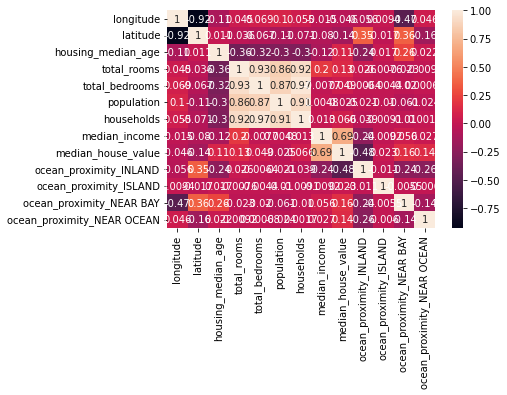

In [19]:
#create heatmap to visulaize the correlations between variables
sns.heatmap(corr_df, annot= True)

# 6.  Extract feature (X) and target (y) :

In [20]:
y=scaled_df.median_house_value

In [21]:
y

0        2.129631
1        1.314156
2        1.258693
3        1.165100
4        1.172900
           ...   
20635   -1.115804
20636   -1.124470
20637   -0.992746
20638   -1.058608
20639   -1.017878
Name: median_house_value, Length: 20640, dtype: float64

In [22]:
X=scaled_df.drop(['median_house_value'], axis = 1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,-0.681889,-0.015566,2.830742,-0.384466
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390860,-0.512592,-0.443449,-1.216128,1.466514,-0.015566,-0.353264,-0.384466
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925139,-0.944405,-1.008420,-0.691593,1.466514,-0.015566,-0.353264,-0.384466
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126106,-0.369537,-0.174042,-1.142593,1.466514,-0.015566,-0.353264,-0.384466
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307379,-0.604429,-0.393753,-1.054583,1.466514,-0.015566,-0.353264,-0.384466


# 7.  Split the dataset : 

In [23]:
#import train_test_split
from sklearn.model_selection import train_test_split
# Split the data into 80% training dataset and 20% test dataset
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 123)

In [24]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
9950,-1.377748,1.286642,-0.050812,-0.740645,-8.798208e-01,-0.813713,-0.877640,0.367796,1.466514,-0.015566,-0.353264,-0.384466
3547,0.484009,-0.642287,-0.845393,1.612714,1.269222e+00,1.399218,1.397938,0.930915,-0.681889,-0.015566,-0.353264,-0.384466
4448,0.678670,-0.731243,1.458891,-0.591211,-3.693934e-01,0.023421,-0.336209,-1.127223,-0.681889,-0.015566,-0.353264,-0.384466
6984,0.773505,-0.782743,0.584852,-0.258880,-3.336158e-01,-0.386315,-0.249894,0.395799,-0.681889,-0.015566,-0.353264,-0.384466
4432,0.683662,-0.726561,1.617807,-0.603129,-5.458963e-01,-0.018082,-0.448680,-0.754390,-0.681889,-0.015566,-0.353264,-0.384466
...,...,...,...,...,...,...,...,...,...,...,...,...
7763,0.733575,-0.806152,0.584852,-0.875411,2.711630e-16,-0.826076,-0.966570,-0.121999,-0.681889,-0.015566,-0.353264,-0.384466
15377,1.162827,-1.058973,-1.163225,0.940260,6.085284e-01,0.892346,0.730958,0.351846,-0.681889,-0.015566,-0.353264,-0.384466
17730,-1.093244,0.795046,-1.878348,0.695482,4.320254e-01,0.891463,0.516479,0.926388,-0.681889,-0.015566,-0.353264,-0.384466
15725,-1.432653,1.005730,1.220517,-0.499992,-4.862670e-01,-0.763379,-0.453912,0.002279,-0.681889,-0.015566,2.830742,-0.384466


In [25]:
#shape of the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 12)
(4128, 12)
(16512,)
(4128,)


# 8. Perform Linear Regression : 

In [26]:
# import LinearRegression
from sklearn.linear_model import LinearRegression

In [27]:
# create Linear Regression model object
lm = LinearRegression()
lm

LinearRegression()

In [28]:
#fit the model
lm.fit(X_train, y_train)

LinearRegression()

In [29]:
print("coef: {}".format(lm.coef_))
print("intercept: {}".format(lm.intercept_)) # y = (coef_)x+intecept_

coef: [-0.45892485 -0.46738145  0.11176633 -0.07764728  0.26887704 -0.40850606
  0.24980283  0.63699517 -0.16289793  0.0208157  -0.01789089  0.01182026]
intercept: 0.0005162579123104241


In [30]:
y_pred = lm.predict(X_test)

In [31]:
y_pred

array([ 0.33465044, -0.65618011, -0.44221433, ..., -1.13808677,
       -0.29731198,  0.86140753])

In [32]:
y_test

19121   -0.478850
20019   -0.932951
15104   -0.627039
3720     0.215301
8938     2.218892
           ...   
313     -0.913885
4596    -0.415588
16287   -1.221530
5771     0.088777
18254    1.318489
Name: median_house_value, Length: 4128, dtype: float64

In [33]:
#import metrics from sklearn
from sklearn import metrics

In [34]:
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print(("r2_score: {}".format(metrics.r2_score(y_test,y_pred))))
## to quickly check how good is the rmse of our model ?
## try to use this genric thumb rule : rmse <= 10% mean(target)
print(0.1*y_train.mean())

rmse: 0.5956353041797614
r2_score: 0.6447553962168038
9.7850646798111e-05


In [35]:
# OLS Regression method 
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2502.
Date:                Wed, 29 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:20:13   Log-Likelihood:                -14874.
No. Observations:               16512   AIC:                         2.977e+04
Df Residuals:                   16499   BIC:                         2.987e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## 10. Bonus exercise: Perform Linear Regression with one independent variable :

In [36]:
# Extract just the median_income column from the independent variables (from X_train and X_test).
X_train_median_income=X_train[['median_income']]
X_test_median_income=X_test[['median_income']]

In [37]:
# print shape 
print(X_train_median_income.shape)
print(y_train.shape)

(16512, 1)
(16512,)


In [38]:
# Perform linear regression
lm = LinearRegression()
# fit the model
lm.fit(X_train_median_income, y_train)


LinearRegression()

In [39]:
print("intercept: {0}, coef: {1}".format(lm.intercept_, lm.coef_))
print("rmse with one independent variable: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print(("r2_score with one independent variable: {}".format(metrics.r2_score(y_test,y_pred))))

intercept: 0.0009623341616246028, coef: [0.68890635]
rmse with one independent variable: 0.5956353041797614
r2_score with one independent variable: 0.6447553962168038


#### Remarks:

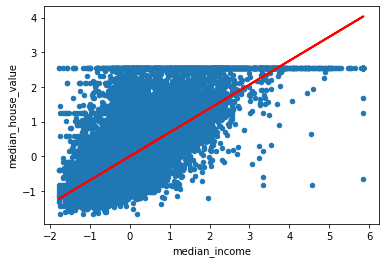

In [40]:
# predict using X_test_median_income.
y_pred_median_income=lm.predict(X_test_median_income)
#visulalize the relationship with indenpendent variable and target.
scaled_df.plot(kind='scatter',x='median_income',y='median_house_value')
plt.plot(X_test_median_income, y_pred_median_income,c='red',linewidth=2)

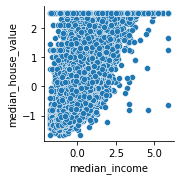

In [41]:
# sns pair plot graph using one independetent variable.
sns.pairplot(scaled_df , x_vars=['median_income'], y_vars= 'median_house_value')
plt.show()

In [42]:
# ordinary least square regression method using median_income as an independent variable.
X2_median_income = sm.add_constant(X_train_median_income)
est = sm.OLS(y_train, X2_median_income)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                 1.491e+04
Date:                Wed, 29 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:20:14   Log-Likelihood:                -18119.
No. Observations:               16512   AIC:                         3.624e+04
Df Residuals:                   16510   BIC:                         3.626e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0010      0.006      0.171

#### Remarks :

The value of p is "0.000" indicates strong linear relationship between median_house_value and median_income.